<a href="https://colab.research.google.com/github/faroquehassan/git_test/blob/main/hw2_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [85]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-24 18:47:18--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2023-09-24 18:47:18 (20.7 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



In [86]:
df = pd.read_csv('housing.csv')

In [87]:
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

Text(0.5, 0, 'Price')

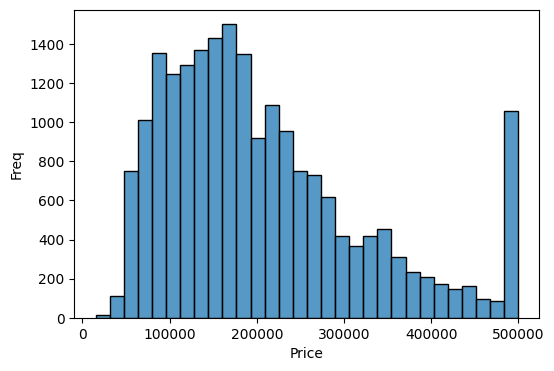

In [88]:
plt.figure(figsize = ((6,4)))
sns.histplot(df['median_house_value'], bins = 30)
plt.ylabel('Freq')
plt.xlabel('Price')

In [89]:
df = df[df['ocean_proximity'].isin(['<1H OCEAN','INLAND'])]

In [90]:
cols = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']

In [91]:
df = df[cols]

In [92]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [93]:
df['population'].describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

In [94]:
np.random.seed(42)
n = len(df)

n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n - (n_val+n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

In [95]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [96]:
y_train_orig = df_train['median_house_value'].values
y_test_orig = df_test['median_house_value'].values
y_val_orig = df_val['median_house_value'].values

y_train = np.log1p(df_train['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [97]:
def prepare_X(df):
  df_num = df.copy()
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [98]:
def train_linear_regression(X,y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones,X])

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  return w[0],w[1:]

In [99]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [100]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
score = round(rmse(y_train, y_pred),2)
print(score)


0.34


In [101]:
def prepare_X(df):
  df_num = df.copy()
  df_num = df_num.fillna(df_train['total_bedrooms'].mean())
  X = df_num.values
  return X

In [102]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
score = round(rmse(y_train, y_pred),2)
print(score)

0.34


In [103]:
def prepare_X(df):
  df_num = df.copy()
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [104]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [107]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, round(rmse(y_val, y_pred),9))

     0 0.340847903
 1e-06 0.340847906
0.0001 0.34084818
 0.001 0.340850692
  0.01 0.34087793
   0.1 0.341286204
     1 0.344895833
     5 0.347739807
    10 0.348314983


In [122]:
rmse_list = []
rmse_num_list = []
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  #Seed and create shuffling 60/20/20 distro
  np.random.seed(i)
  n = len(df)
  n_val = int(0.2*n)
  n_test = int(0.2*n)
  n_train = n - (n_val+n_test)
  idx = np.arange(n)
  np.random.shuffle(idx)
  df_shuffled = df.iloc[idx]

  #create shuffled dfs
  df_train = df_shuffled.iloc[:n_train].copy()
  df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
  df_test = df_shuffled.iloc[n_train+n_val:].copy()

  #reset index
  df_train = df_train.reset_index(drop=True)
  df_val = df_val.reset_index(drop=True)
  df_test = df_test.reset_index(drop=True)

  #separate the output
  y_train_orig = df_train['median_house_value'].values
  y_test_orig = df_test['median_house_value'].values
  y_val_orig = df_val['median_house_value'].values

  #log transformation
  y_train = np.log1p(df_train['median_house_value'].values)
  y_test = np.log1p(df_test['median_house_value'].values)
  y_val = np.log1p(df_val['median_house_value'].values)

  #delete from training datasets
  del df_train['median_house_value']
  del df_val['median_house_value']
  del df_test['median_house_value']

  #prepare X array
  def prepare_X(df):
    df_num = df.copy()
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

  #lets train w/o regularization
  def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0],w[1:]

  #rmse
  def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

  X_train = prepare_X(df_train)
  X_val = prepare_X(df_val)

  w_0, w = train_linear_regression(X_train, y_train)
  y_pred = w_0 + X_val.dot(w)
  print(i, (rmse(y_val, y_pred)))
  rmse_list.append(str(i) + str(' rmse: ')+ str(rmse(y_val, y_pred)))
  rmse_num_list.append(rmse(y_val, y_pred))






0 0.33773871600429795
1 0.3377999353665367
2 0.33842870067535874
3 0.33200494683039145
4 0.33944518625559017
5 0.34338197052661196
6 0.33853302117699696
7 0.34687476972995035
8 0.35127368659627567
9 0.3341558266520752


In [123]:
std = np.std(rmse_num_list)

In [125]:
round(std,3)

0.005

In [129]:
#question 6

for i in [9]:
  #Seed and create shuffling 60/20/20 distro
  np.random.seed(i)
  n = len(df)
  n_val = int(0.2*n)
  n_test = int(0.2*n)
  n_train = n - (n_val+n_test)
  idx = np.arange(n)
  np.random.shuffle(idx)
  df_shuffled = df.iloc[idx]

  #create shuffled dfs
  df_train = df_shuffled.iloc[:n_train].copy()
  df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
  df_test = df_shuffled.iloc[n_train+n_val:].copy()

  df_train = df_train.reset_index(drop=True)
  df_val = df_val.reset_index(drop=True)
  df_test = df_test.reset_index(drop=True)

  #separate the output
  y_train_orig = df_train['median_house_value'].values
  y_test_orig = df_test['median_house_value'].values
  y_val_orig = df_val['median_house_value'].values

  #log transformation
  y_train = np.log1p(df_train['median_house_value'].values)
  y_test = np.log1p(df_test['median_house_value'].values)
  y_val = np.log1p(df_val['median_house_value'].values)

  #delete from training datasets
  del df_train['median_house_value']
  del df_val['median_house_value']
  del df_test['median_house_value']

  #prepare X array
  def prepare_X(df):
    df_num = df.copy()
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

  #lets train w regularization and r =0.001
  def train_linear_regression_reg(X, y, r=0.001):
      ones = np.ones(X.shape[0])
      X = np.column_stack([ones, X])

      XTX = X.T.dot(X)
      reg = r * np.eye(XTX.shape[0])
      XTX = XTX + reg

      XTX_inv = np.linalg.inv(XTX)
      w = XTX_inv.dot(X.T).dot(y)

      return w[0], w[1:]

  #rmse
  def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

  #full train datasets

  df_full_train = pd.concat([df_train,df_val])
  df_full_train = df_full_train.reset_index(drop=True)

  X_full_train = prepare_X(df_full_train)
  y_full_train = np.concatenate([y_train,y_val])

  w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r =0.001)
  X_test = prepare_X(df_test)
  y_pred = w_0 + X_test.dot(w)
  score = ((rmse(y_test, y_pred)))
  print(score)







0.33498993366147484
